In [1337]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [1338]:
df=pd.read_csv("HINDUNILVR.csv",index_col='Date',parse_dates=True)

In [1339]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HINDUNILVR,EQ,2307.75,2324.0,2369.80,2311.00,2367.70,2360.65,2340.89,1946867,4.557405e+14,85684.0,1289103.0,0.6621
2021-04-27,HINDUNILVR,EQ,2360.65,2363.0,2386.45,2352.95,2378.00,2379.85,2374.40,1668456,3.961583e+14,84641.0,1089882.0,0.6532
2021-04-28,HINDUNILVR,EQ,2379.85,2380.0,2445.00,2366.30,2404.00,2406.55,2414.15,1951215,4.710522e+14,84910.0,1024216.0,0.5249


# Data Preprocessing

In [1340]:
df['Date']=df.index

In [1341]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [1342]:
df=df.loc[mask]

In [1343]:
df=df.ffill()

In [1344]:
df['Prev Close'].isnull().values.any()

False

In [1345]:
df=df.drop(columns=['Date','Symbol','Series'])

In [1346]:
df.dropna(inplace=True)

<AxesSubplot:>

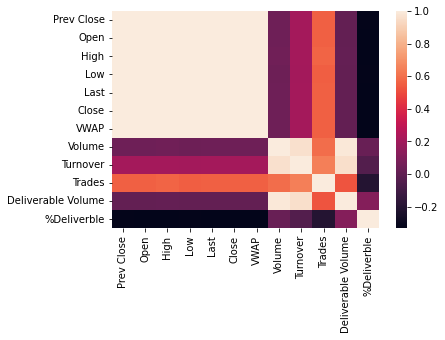

In [1347]:
sn.heatmap(df.corr())

In [1348]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2502, freq='B')

In [1349]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [1350]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [1351]:
Decomp_results=seasonal_decompose(df['Prev Close'])

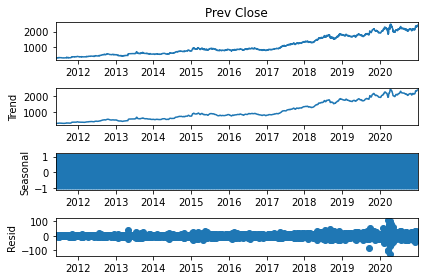

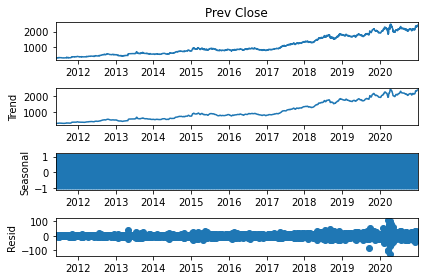

In [1352]:
Decomp_results.plot()

In [1353]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [1354]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [1355]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-23330.893, Time=2.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21969.947, Time=2.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22617.029, Time=2.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23239.324, Time=2.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4903.008, Time=1.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-23344.929, Time=2.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-23359.311, Time=2.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-23348.000, Time=2.98 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-23263.599, Time=2.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-23351.654, Time=3.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-23361.331, Time=2.42 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-23241.325, Time=2.41 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-23346.930, Time=2.58 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-23350.028, Time=2.77 sec
 ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:               SARIMAX(0, 1, 2)   Log Likelihood               11694.666
Date:                Sun, 25 Sep 2022   AIC                         -23361.331
Time:                        12:07:16   BIC                         -23279.789
Sample:                             0   HQIC                        -23331.728
                               - 2502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   8.66e-36   1.15e+35      0.000       1.000       1.000
x2         -2.255e-17   1.18e-35  -1.91e+18      0.000   -2.26e-17   -2.26e-17
x3         -1.943e-16   1.03e-35   -1.9e+19      0.000   -1.94e-16   -1.94e-16
x4           2.22e-16   1.08e-35   2.06e+19      0.000    2.22e-16    2.22e-16
x5          9.714e-17   7.73e-36   1.26e+19      0.000    9.71e-17    9.71e-17
x6          4.857e-17   7.96e-36    6.1e+18      0.000    4.86e-17    4.86e-17
x7         -2.776e-17   1.17e-35  -2.38e+18      0.000   -2.78e-17   -2.78e-17
x8         -1.863e-17   7.79e-30  -2.39e+12      0.000   -1.86e-17   -1.86e-17
x9         -3.061e-18   1.49e-21  -2053.558      0.000   -3.06e-18   -3.06e-18
x10         2.098e-17   3.09e-32   6.79e+14      0.000     2.1e-17     2.1e-17
x11         6.841e-18   5.96e-30   1.15e+12      0.000    6.84e-18    6.84e-18
ma.L1         -0.7963   2.19e-41  -3.64e+40      0.000      -0.796      -0.796
ma.L2         -0.0492   9.53e-42  -5.16e+39      0.000      -0.049      -0.049
sigma2      5.417e-06   4.21e-34   1.29e+28      0.000    5.42e-06    5.42e-06
===================================================================================
Ljung-Box (L1) (Q):                  13.03   Jarque-Bera (JB):         386147429.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             168.36   Skew:                            41.05
Prob(H) (two-sided):                  0.00   Kurtosis:                      1926.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.45e+56. Standard errors may be unstable.
"""

# ARIMAX

In [1356]:
model_arimax=ARIMA(train,exog=exo_train,order=(0,1,2))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                 1751
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -5914.444
Method:                       css-mle   S.D. of innovations             18.946
Date:                Sun, 25 Sep 2022   AIC                          11858.888
Time:                        12:10:14   BIC                          11940.907
Sample:                    06-02-2011   HQIC                         11889.206
                         - 02-15-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3851      0.586      0.657      0.511      -0.764       1.534
Prev Close            -0.7768      0.039    -19.752      0.000      -0.854      -0.700
Open                  -0.0899      0.046     -1.961      0.050      -0.180   -4.04e-05
High                   0.0781      0.057      1.374      0.169      -0.033       0.189
Low                    0.9512      0.080     11.843      0.000       0.794       1.109
Last                  -0.0595      0.089     -0.667      0.505      -0.234       0.115
Close                  0.0852      0.116      0.733      0.464      -0.143       0.313
VWAP                  -0.1804      0.096     -1.870      0.061      -0.370       0.009
Volume              1.208e-06   2.59e-07      4.670      0.000    7.01e-07    1.72e-06
Turnover            1.481e-14   5.54e-10   2.67e-05      1.000   -1.09e-09    1.09e-09
Trades              6.942e-06   2.11e-05      0.330      0.742   -3.43e-05    4.82e-05
Deliverable Volume -2.696e-06        nan        nan        nan         nan         nan
ma.L1.D.Low           -0.0431      0.060     -0.724      0.469      -0.160       0.074
ma.L2.D.Low            0.0177      0.024      0.754      0.451      -0.028       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2154           -7.4094j            7.5084           -0.2241
MA.2            1.2154           +7.4094j            7.5084            0.2241
-----------------------------------------------------------------------------
"""

# SARIMAX

In [1357]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(0,1,2),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                 1752
Model:               SARIMAX(0, 1, 2)   Log Likelihood               13163.304
Date:                Sun, 25 Sep 2022   AIC                         -26298.609
Time:                        12:10:17   BIC                         -26222.057
Sample:                    06-01-2011   HQIC                        -26270.311
                         - 02-15-2018                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close         -3.332e-12   4.68e-35  -7.12e+22      0.000   -3.33e-12   -3.33e-12
Open                4.322e-12   9.42e-35   4.59e+22      0.000    4.32e-12    4.32e-12
High               -1.696e-12   2.91e-34  -5.83e+21      0.000    -1.7e-12    -1.7e-12
Low                    1.0000   8.37e-35    1.2e+34      0.000       1.000       1.000
Last                7.572e-14   2.28e-34   3.32e+20      0.000    7.57e-14    7.57e-14
Close              -1.979e-13    2.4e-34  -8.23e+20      0.000   -1.98e-13   -1.98e-13
VWAP               -2.591e-13   2.13e-34  -1.22e+21      0.000   -2.59e-13   -2.59e-13
Volume              -7.73e-17   8.49e-29   -9.1e+11      0.000   -7.73e-17   -7.73e-17
Turnover             1.61e-18   5.78e-21    278.587      0.000     1.6e-18    1.62e-18
Trades             -4.113e-17   7.36e-31  -5.59e+13      0.000   -4.11e-17   -4.11e-17
Deliverable Volume  6.217e-17      5e-29   1.24e+12      0.000    6.22e-17    6.22e-17
ma.L1                 -0.4386   2.11e-40  -2.08e+39      0.000      -0.439      -0.439
ma.L2                 -0.1647   4.73e-40  -3.48e+38      0.000      -0.165      -0.165
sigma2              1.756e-08   2.57e-31   6.83e+22      0.000    1.76e-08    1.76e-08
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):            136913.36
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -3.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.41e+54. Standard errors may be unstable.
"""

# Prediction

In [1358]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [1359]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [1360]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

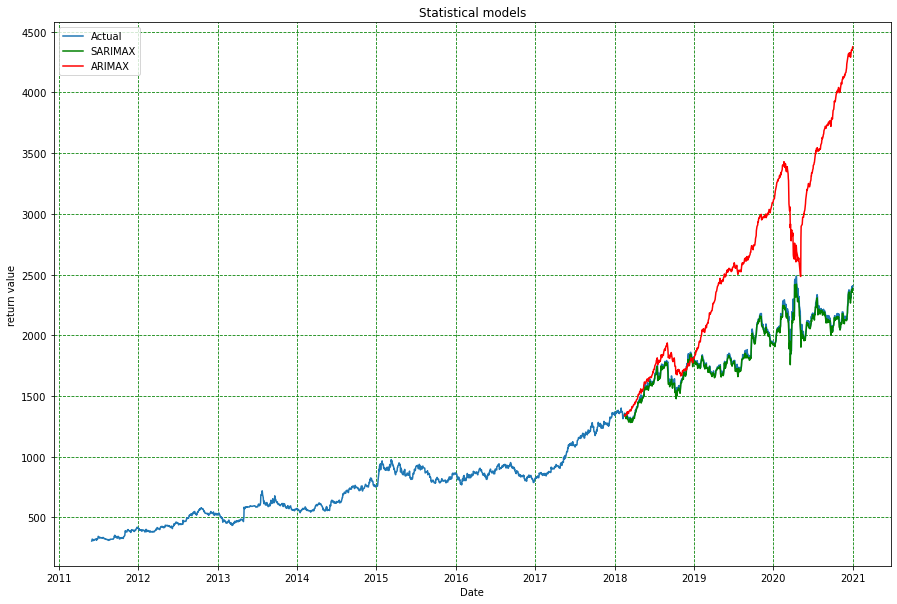

In [1361]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [1362]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

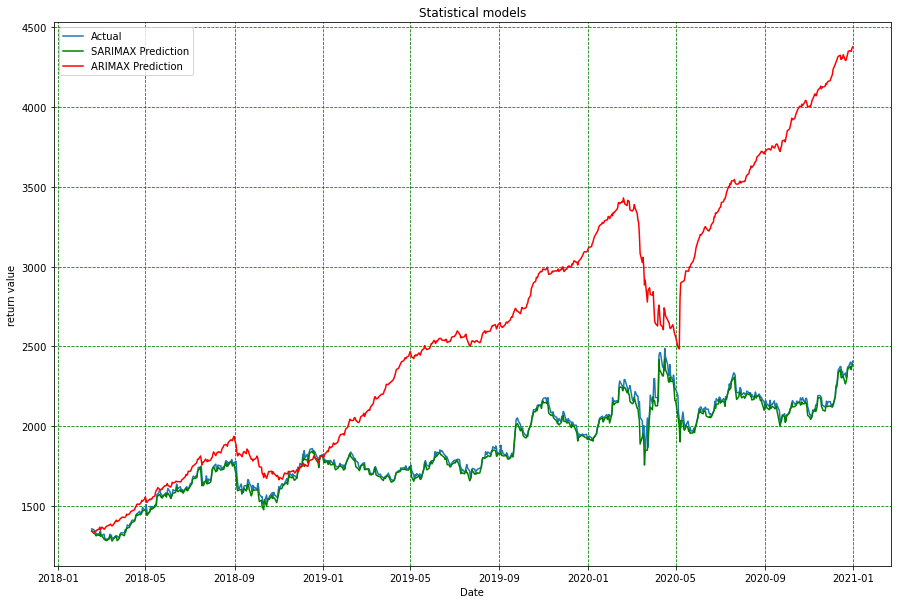

In [1363]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [1364]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

935.0558747296728


In [1365]:
error=mean_absolute_error(test,pred_arimax)
print(error)

721.4072095777718


In [1366]:
r2_score(test,pred_arimax)

-11.264104373674504

    SARIMAX

In [1367]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

30.53667963046024


In [1335]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

25.91647041683626


In [1336]:
r2_score(test,pred_sarimax)

0.9485303463648814